In [12]:
import itertools
import pandas as pd

data = pd.concat((pd.read_csv("./per_frame_delay.csv"), pd.read_csv("./per_frame_delay_high_corr.csv"), pd.read_csv("./per_frame_delay_new_runs.csv")))
models = pd.CategoricalDtype(["curve-low", "curve-high", "legacy", "first-order", "first-order-median"], ordered=False)
data["model"] = data["model"].astype(models)
data = data[data["rho"] < 0.8]
data = data[data["sigma"] < 3.2]

rho_sigma_dtype = pd.CategoricalDtype(map(lambda t: f"{t[0]} {t[1]}", itertools.product(sorted(data["rho"].unique()), sorted(data["sigma"].unique()))), ordered=True)

data["rho"] = data["rho"].astype("category")
data["sigma"] = data["sigma"].astype("category")


data["rho_sigma"] = data[["rho", "sigma"]].apply(func=lambda row: f"{row.rho} {row.sigma}", axis=1).astype(rho_sigma_dtype)
data["model"] = data["model"].replace({
    "first-order": "Ref. Stochastic",
    "first-order-median": "Ref. Median",
    "curve-low": "Multi-curve (low neuroticism)",
    "curve-high": "Multi-curve (high neuroticism)",
    "legacy": "Legacy EdgeDroid 1.0"
})
data

,step_number,last_frame_rtt,execution_time,step_duration,time_to_feedback,wait_time,frame_count,model,rep,rho,sigma,rho_sigma
0,0,0.143041,0.000000,0.143041,0.143041,0.000000,1,Multi-curve (high neuroticism),0,0.0,0.1,0.0 0.1
1,1,0.201519,5.004304,5.333957,0.329653,0.128135,33,Multi-curve (high neuroticism),0,0.0,0.1,0.0 0.1
2,2,0.143975,5.072477,5.222050,0.149573,0.005599,32,Multi-curve (high neuroticism),0,0.0,0.1,0.0 0.1
3,3,0.067107,5.006894,5.083496,0.076602,0.009495,27,Multi-curve (high neuroticism),0,0.0,0.1,0.0 0.1
4,4,0.140907,4.585061,4.731451,0.146390,0.005483,33,Multi-curve (high neuroticism),0,0.0,0.1,0.0 0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
152740,46,8.462197,5.230947,15.987065,10.756118,2.293921,2,Ref. Median,29,0.7,1.6,0.7 1.6
152741,47,9.192778,5.230947,19.018868,13.787921,4.595142,2,Ref. Median,29,0.7,1.6,0.7 1.6
152742,48,18.223608,5.230947,26.846506,21.615559,3.391951,2,Ref. Median,29,0.7,1.6,0.7 1.6
152743,49,7.776005,5.230947,19.948691,14.717744,6.941738,2,Ref. Median,29,0.7,1.6,0.7 1.6


In [13]:
total_durations = data.groupby(["model", "rep", "rho", "sigma", "rho_sigma"], observed=True)["step_duration"].sum().reset_index()
total_durations

,model,rep,rho,sigma,rho_sigma,step_duration
0,Multi-curve (low neuroticism),0,0.0,0.1,0.0 0.1,194.621116
1,Multi-curve (low neuroticism),0,0.0,0.2,0.0 0.2,236.042004
2,Multi-curve (low neuroticism),0,0.0,0.4,0.0 0.4,293.955499
3,Multi-curve (low neuroticism),0,0.0,0.8,0.0 0.8,341.913779
4,Multi-curve (low neuroticism),0,0.0,1.6,0.0 1.6,454.097454
...,...,...,...,...,...,...
3745,Ref. Median,29,0.7,0.1,0.7 0.1,315.987521
3746,Ref. Median,29,0.7,0.2,0.7 0.2,351.020696
3747,Ref. Median,29,0.7,0.4,0.7 0.4,542.513811
3748,Ref. Median,29,0.7,0.8,0.7 0.8,513.347760


mean duration


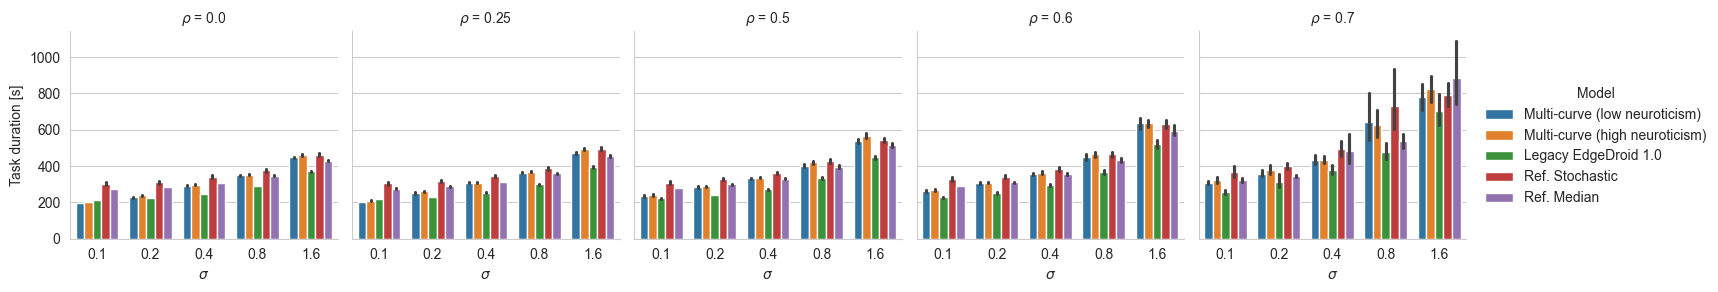

In [32]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

print("mean duration")
fg = sns.catplot(kind="bar", data=total_durations, hue="model", y="step_duration", x="sigma", col="rho", height=3)
fg.set_axis_labels(r"$\sigma$", "Task duration [s]")
fg.set_titles(col_template=r"$\rho$ = {col_name}")
fg.legend.set_title("Model")
# fg.set(yscale="log")
plt.show()

# push correlation higher

mean number of frames


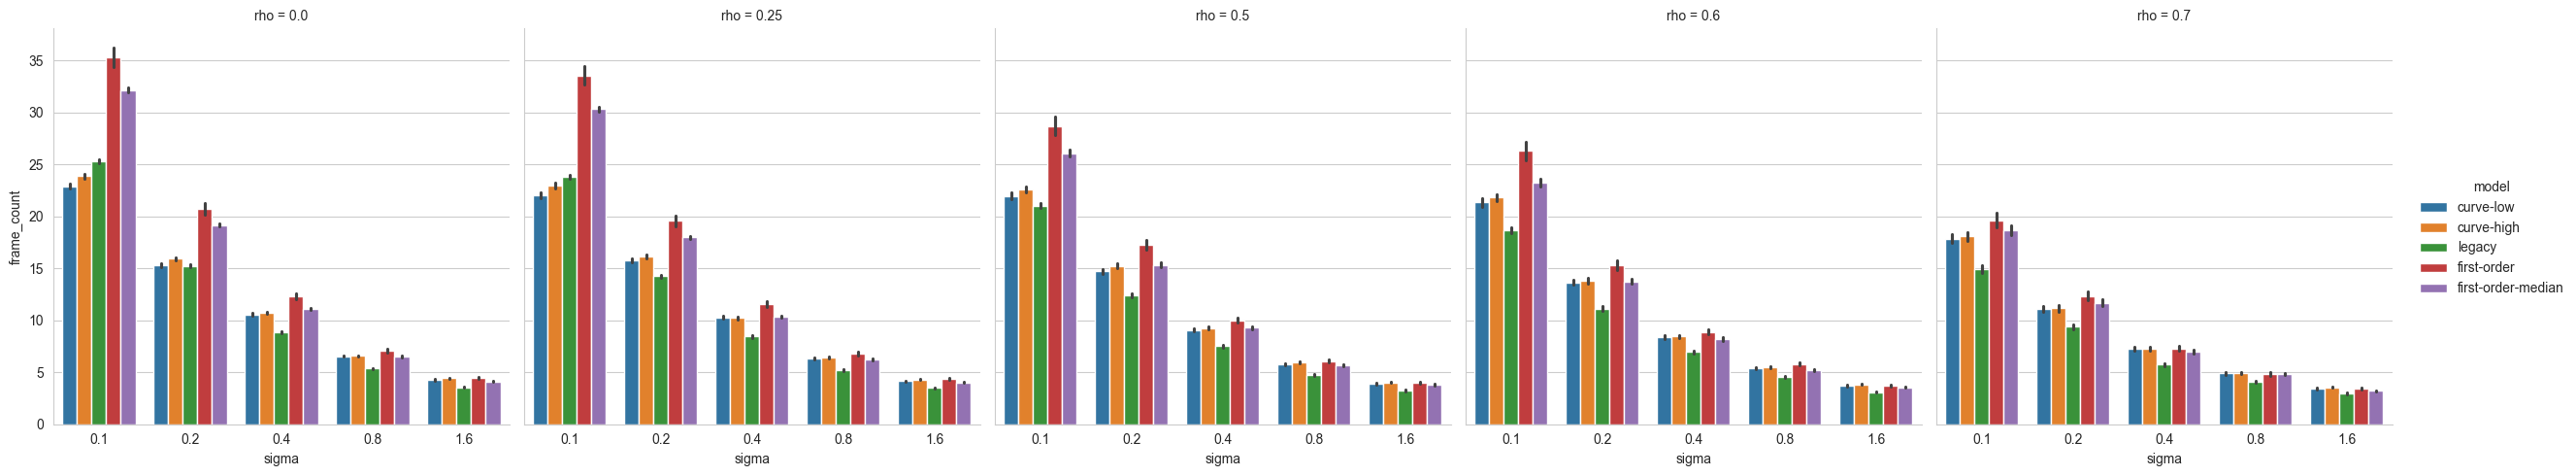

In [4]:
print("mean number of frames")
fg = sns.catplot(kind="bar", data=data, y="frame_count", hue="model", x="sigma", col="rho")
plt.show()

mean TTF


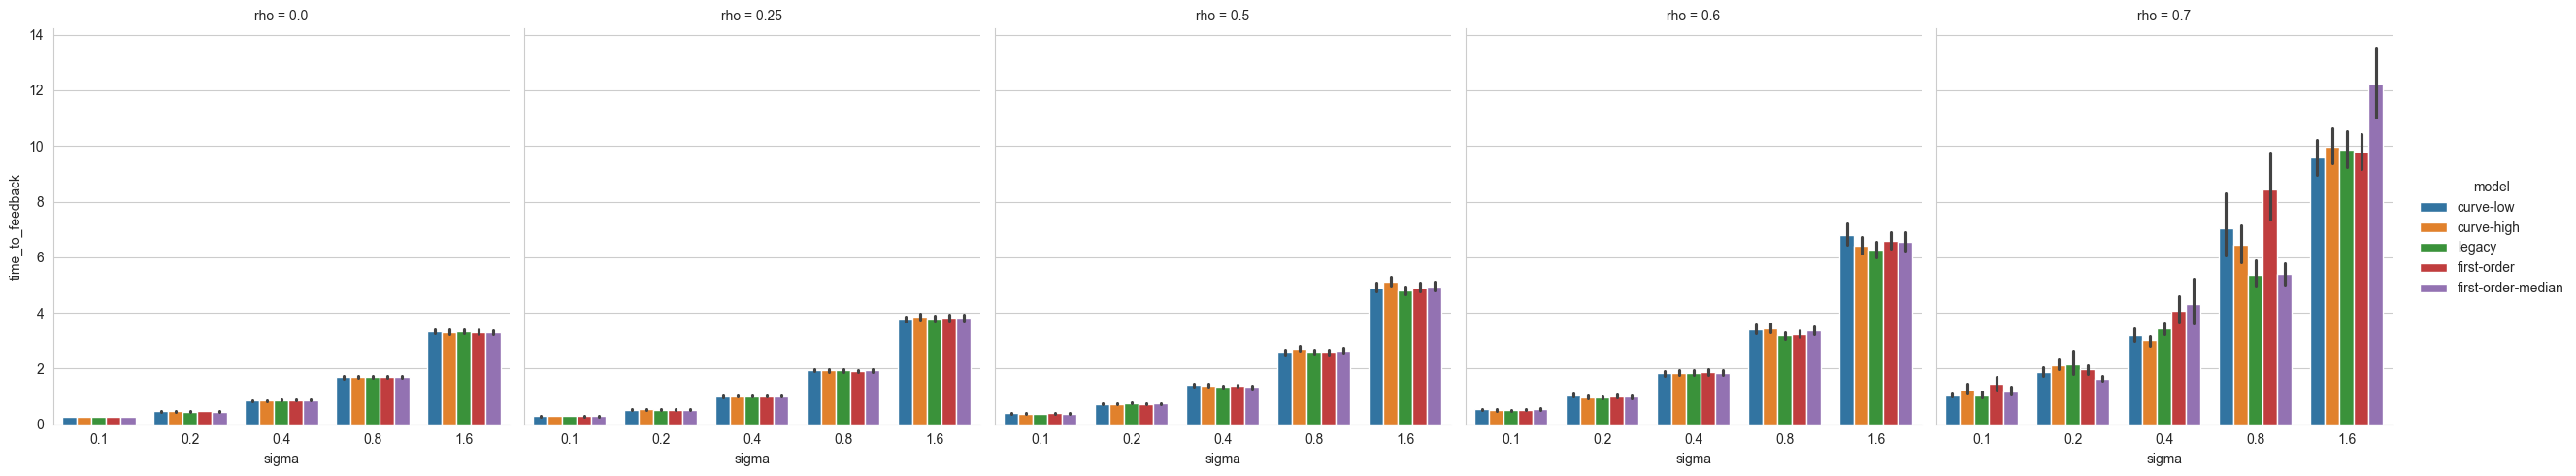

In [5]:
print("mean TTF")
fg = sns.catplot(kind="bar", data=data, hue="model", y="time_to_feedback", x="sigma", col="rho")
plt.show()

mean wait time


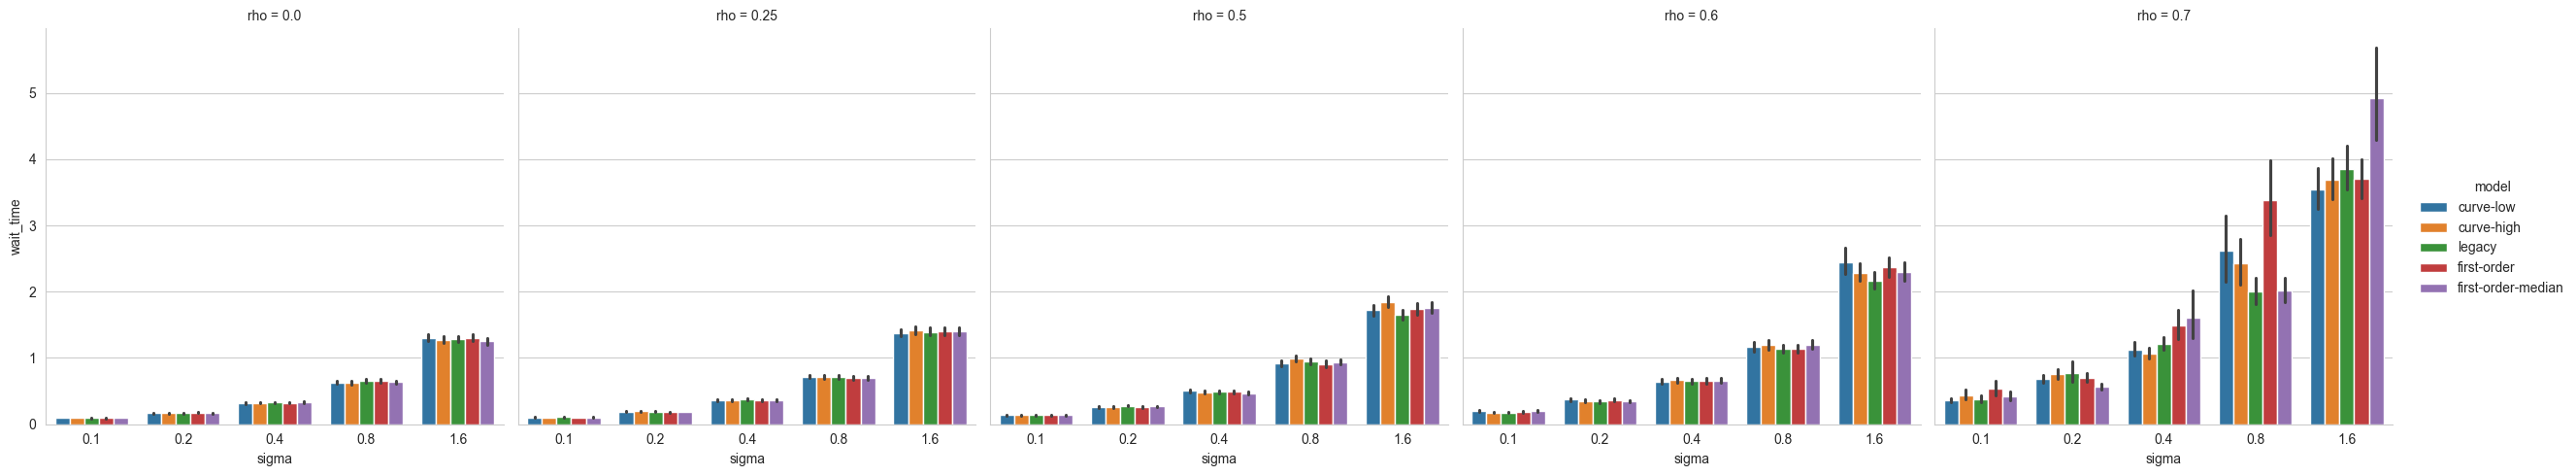

In [6]:
print("mean wait time")
fg = sns.catplot(kind="bar", data=data, hue="model", y="wait_time", x="sigma", col="rho")
plt.show()

mean last frame rtt


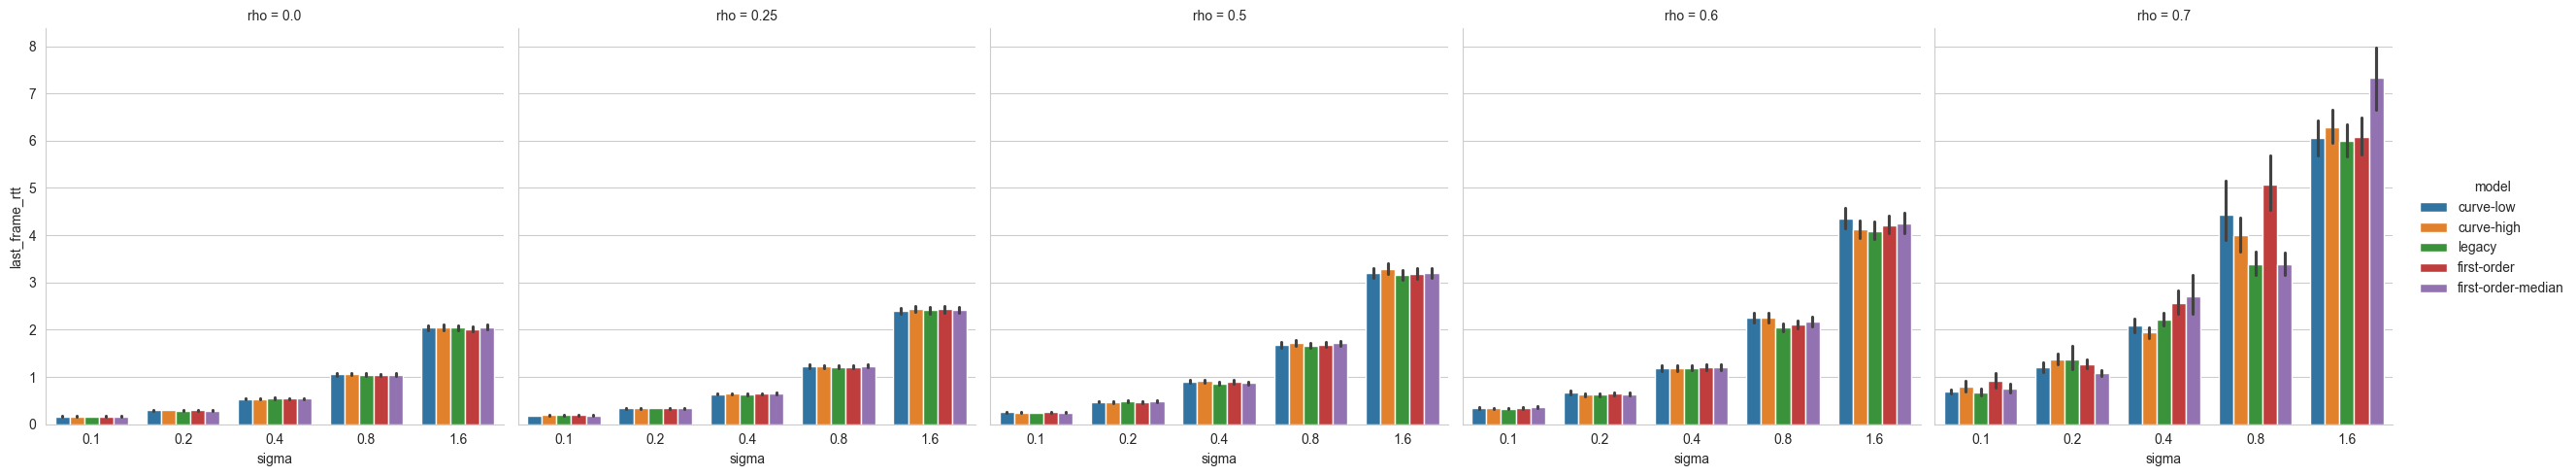

In [7]:
print("mean last frame rtt")
fg = sns.catplot(kind="bar", data=data, hue="model", y="last_frame_rtt", x="sigma", col="rho")
plt.show()

In [8]:
data["rep"].max()

29

In [ ]:
b